In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz 

from sklearnex import patch_sklearn
patch_sklearn()

pd.set_option('display.max_columns', None)

sns.set()
seed = 123

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Import data

In [2]:
raw_df = pd.read_csv('loan.csv')
raw_df.head()

/Users/pumrapee/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [3]:
raw_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,2.260639e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,3.068792e-01,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.477304e+00,2.036667e+00,4.521656e+00,1.354780e+04,1.139426e+04,5.789995e+01,8.464413e-03,1.236983e+01,1.257378e+02,1.814916e+02,1.402409e+01,8.297469e+00,1.555382e+00,2.484485e+01,39.303090,7.024194e+00,35.782223,5.002082e-01,3.67

# Data Cleansing and Selection
Select Data on Individual Application Type

In [4]:
# Select Induvidual from data
print(raw_df['application_type'].value_counts())

ind_df = raw_df[raw_df['application_type'] == 'Individual']
print(ind_df['application_type'].value_counts())
ind_df.drop(columns=['application_type'], inplace=True)
ind_df.head()

Individual    2139958
Joint App      120710
Name: application_type, dtype: int64
Individual    2139958
Name: application_type, dtype: int64


/Users/pumrapee/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0

Select some columns to analysis base on my research on metadata

In [5]:
select_col = [
    'loan_status',
    'loan_amnt',
    'term',
    'int_rate',
    'installment',
    'emp_length',
    'annual_inc',
    'verification_status',
    'dti',
    'funded_amnt',
    'inq_fi',
    'inq_last_12m',
    'inq_last_6mths',
    'pub_rec',
    'pub_rec_bankruptcies',
    'purpose',
    'pymnt_plan',
    'tax_liens',
    'hardship_flag',
    'hardship_status',
    'grade'
]

selected_df = ind_df[select_col].copy()
selected_df.head()

,loan_status,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,funded_amnt,inq_fi,inq_last_12m,inq_last_6mths,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,tax_liens,hardship_flag,hardship_status,grade
0,Current,2500,36 months,13.56,84.92,10+ years,55000.0,Not Verified,18.24,2500,1.0,2.0,1.0,1.0,1.0,debt_consolidation,n,0.0,N,NaN,C
1,Current,30000,60 months,18.94,777.23,10+ years,90000.0,Source Verified,26.52,30000,2.0,2.0,0.0,1.0,1.0,debt_consolidation,n,0.0,N,NaN,D
2,Current,5000,36 months,17.97,180.69,6 years,59280.0,Source Verified,10.51,5000,1.0,0.0,0.0,0.0,0.0,debt_consolidation,n,0.0,N,NaN,D
3,Current,4000,36 months,18.94,146.51,10+ years,92000.0,Source Verified,16.74,4000,2.0,3.0,0.0,0.0,0.0,debt_consolidation,n,0.0,N,NaN,D
4,Current,30000,60 months,16.14,731.78,10+ years,57250.0,Not Verified,26.35,30000,1.0,0.0,0.0,0.0,0.0,debt_consolidation,n,0.0,N,NaN,C


Cleaning Hardship Flag and Hardship Status.

In [6]:
selected_df['hardship_flag'].value_counts()

N    2139184
Y        774
Name: hardship_flag, dtype: int64

In [7]:
selected_df['hardship_status'].value_counts()

COMPLETED    7225
BROKEN       2088
ACTIVE        774
Name: hardship_status, dtype: int64

In [8]:
len(selected_df[selected_df['hardship_status'].isna()])

2129871

With Hardship Flag is 'N', I need to set Hardship Status into 'No Hardship'.

In [9]:
selected_df['hardship_status'] = selected_df[selected_df['hardship_flag'] == 'N']['hardship_status'].fillna("No Hardship")
print(selected_df.isnull().sum())

loan_status                  0
loan_amnt                    0
term                         0
int_rate                     0
installment                  0
emp_length              130357
annual_inc                   4
verification_status          0
dti                          0
funded_amnt                  0
inq_fi                  865781
inq_last_12m            865782
inq_last_6mths              30
pub_rec                     29
pub_rec_bankruptcies      1365
purpose                      0
pymnt_plan                   0
tax_liens                  105
hardship_flag                0
hardship_status            774
grade                        0
dtype: int64


In [10]:
selected_df.dropna(inplace=True)
print(selected_df.isnull().sum())

loan_status             0
loan_amnt               0
term                    0
int_rate                0
installment             0
emp_length              0
annual_inc              0
verification_status     0
dti                     0
funded_amnt             0
inq_fi                  0
inq_last_12m            0
inq_last_6mths          0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
pymnt_plan              0
tax_liens               0
hardship_flag           0
hardship_status         0
grade                   0
dtype: int64


In [11]:
df = selected_df.copy()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186697 entries, 0 to 2260667
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_status           1186697 non-null  object 
 1   loan_amnt             1186697 non-null  int64  
 2   term                  1186697 non-null  object 
 3   int_rate              1186697 non-null  float64
 4   installment           1186697 non-null  float64
 5   emp_length            1186697 non-null  object 
 6   annual_inc            1186697 non-null  float64
 7   verification_status   1186697 non-null  object 
 8   dti                   1186697 non-null  float64
 9   funded_amnt           1186697 non-null  int64  
 10  inq_fi                1186697 non-null  float64
 11  inq_last_12m          1186697 non-null  float64
 12  inq_last_6mths        1186697 non-null  float64
 13  pub_rec               1186697 non-null  float64
 14  pub_rec_bankruptcies  1186697 non-

,loan_status,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,funded_amnt,inq_fi,inq_last_12m,inq_last_6mths,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,tax_liens,hardship_flag,hardship_status,grade
0,Current,2500,36 months,13.56,84.92,10+ years,55000.0,Not Verified,18.24,2500,1.0,2.0,1.0,1.0,1.0,debt_consolidation,n,0.0,N,No Hardship,C
1,Current,30000,60 months,18.94,777.23,10+ years,90000.0,Source Verified,26.52,30000,2.0,2.0,0.0,1.0,1.0,debt_consolidation,n,0.0,N,No Hardship,D
2,Current,5000,36 months,17.97,180.69,6 years,59280.0,Source Verified,10.51,5000,1.0,0.0,0.0,0.0,0.0,debt_consolidation,n,0.0,N,No Hardship,D
3,Current,4000,36 months,18.94,146.51,10+ years,92000.0,Source Verified,16.74,4000,2.0,3.0,0.0,0.0,0.0,debt_consolidation,n,0.0,N,No Hardship,D
4,Current,30000,60 months,16.14,731.78,10+ years,57250.0,Not Verified,26.35,30000,1.0,0.0,0.0,0.0,0.0,debt_consolidation,n,0.0,N,No Hardship,C


# Loan status

=== Loan Status Values ===
Current               715879
Fully Paid            347141
Charged Off            98576
Late (31-120 days)     15896
In Grace Period         6571
Late (16-30 days)       2611
Default                   23
Name: loan_status, dtype: int64
=== Approved Values ===
1    1065631
0     121066
Name: approved, dtype: int64


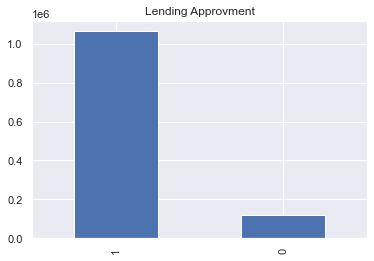

In [12]:
# Target variable: Change loan_status to Approved
print("=== Loan Status Values ===")
print(df['loan_status'].value_counts())

# Create approved to 0: Reject, 1: Approve
df['approved'] = df['loan_status'].map({
    'Fully Paid': 1,
    'Current': 1,
    'Charged Off': 0,
    'Late (31-120 days)': 0,
    'In Grace Period': 0,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Does not meet the credit policy. Status:Charged Off': 0,
    'Late (16-30 days)': 1,
    'Default': 0
})
df['rejected'] = df['approved'].map({0:1, 1:0})
df.drop(columns=['loan_status'], inplace=True)

print("=== Approved Values ===")
print(df['approved'].value_counts())
df['approved'] = df['approved'].astype('object')
df['approved'].value_counts().plot.bar()
plt.title("Lending Approvment")

plt.show()

In [13]:
print("Approved")
print(len(df[df['approved'] == 1]) / len(df))
print("Reject")
print(len(df[df['approved'] == 0]) / len(df))

Approved
0.8979806976844131
Reject
0.10201930231558688


In [14]:
print(df.isnull().sum())

loan_amnt               0
term                    0
int_rate                0
installment             0
emp_length              0
annual_inc              0
verification_status     0
dti                     0
funded_amnt             0
inq_fi                  0
inq_last_12m            0
inq_last_6mths          0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
pymnt_plan              0
tax_liens               0
hardship_flag           0
hardship_status         0
grade                   0
approved                0
rejected                0
dtype: int64


# EDA on Categorical dataset

# Term of lending

<AxesSubplot:xlabel='term'>

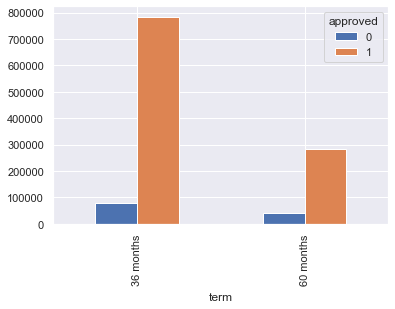

In [15]:
# Compare term to approved
pd.pivot_table(df, values='dti', index=['term'], columns=['approved'], aggfunc='count').plot.bar()

# Verification Status

<AxesSubplot:xlabel='verification_status'>

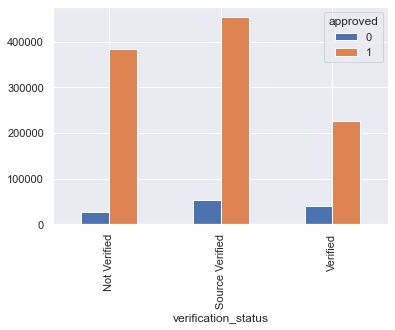

In [16]:
pd.pivot_table(df, values='dti', index=['verification_status'], columns=['approved'], aggfunc='count').plot.bar()

# Employment Length (Year)

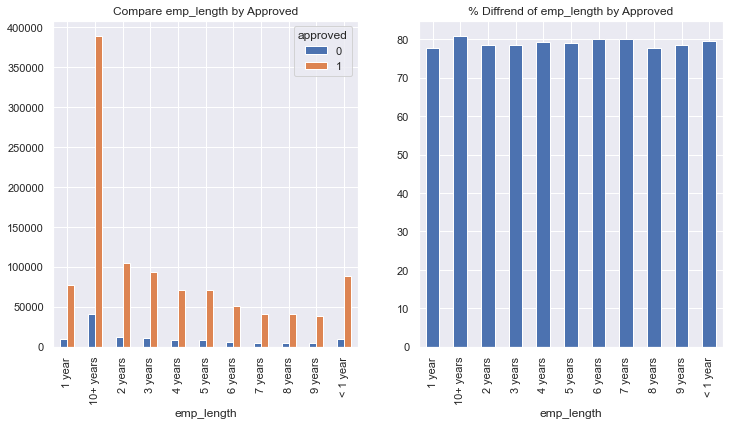

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

pd.pivot_table(df, values='dti', index=['emp_length'], columns=['approved'], aggfunc='count').plot.bar(ax=axes[0])
axes[0].set_title("Compare emp_length by Approved")

# % of approved compare to rejected
pct_emp_length = pd.pivot_table(df, values='dti', index=['emp_length'], columns=['approved'], aggfunc='count')
pct_emp_length['pct'] = pct_emp_length.apply(lambda x:np.multiply(np.divide(np.subtract(x[1.0], x[0.0]), np.add(x[1.0], x[0.0])), 100), axis=1)
pct_emp_length['pct'].plot.bar(ax=axes[1])
axes[1].set_title("% Diffrend of emp_length by Approved")

plt.show()

In [20]:
# Change dtypes to object of number
df['emp_length'] = df['emp_length'].map({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
})

print(df['emp_length'].dtype)

int64


# Purpose

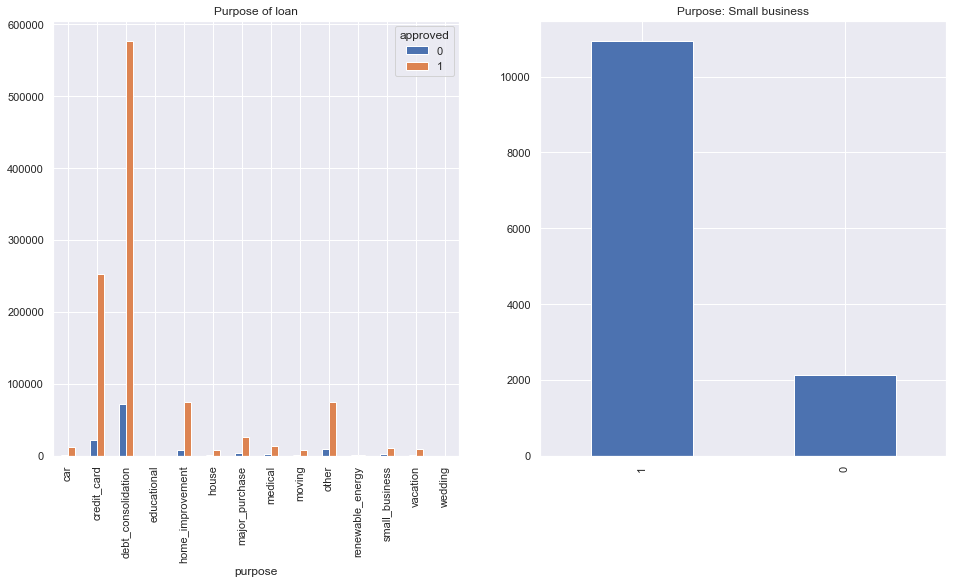

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

pd.pivot_table(df, values='dti', index=['purpose'], columns=['approved'], aggfunc='count').plot.bar(ax=axes[0])
axes[0].set_title("Purpose of loan")

df[df['purpose'] == 'small_business']['approved'].value_counts().plot.bar()
axes[1].set_title("Purpose: Small business")

plt.show()

# Hardship

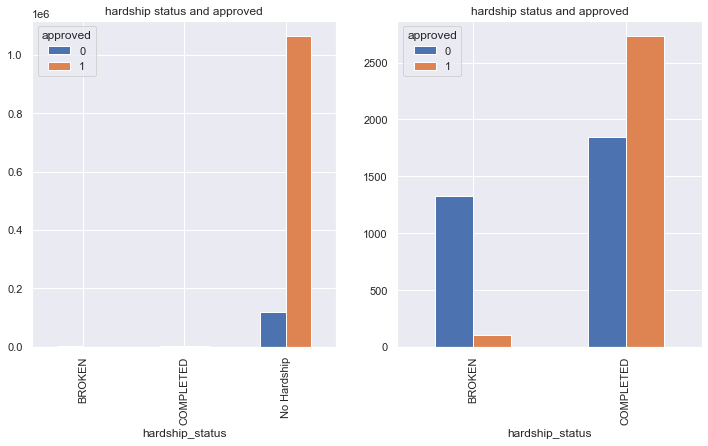

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
# pd.pivot_table(df[df['hardship_flag'] == 'Y'], values='dti', index=['hardship_status'], columns=['approved'], aggfunc='count').plot.bar(ax=axes[0])
# axes[0].set_title("hardship_flag = Y")
# pd.pivot_table(df[(df['hardship_flag'] == 'N') & (df['hardship_status'] != 'No Hardship')], values='dti', index=['hardship_status'], columns=['approved'], aggfunc='count').plot.bar(ax=axes[1])
# axes[1].set_title("hardship_flag = N")

pd.pivot_table(df, values='dti', index=['hardship_status'], columns=['approved'], aggfunc='count').plot.bar(ax=axes[0])
axes[0].set_title("hardship status and approved")

pd.pivot_table(df[df['hardship_status'] != 'No Hardship'], values='dti', index=['hardship_status'], columns=['approved'], aggfunc='count').plot.bar(ax=axes[1])
axes[1].set_title("hardship status and approved")

plt.show()

In [23]:
# Use hardship_status and drop hardship_flag
df.drop(columns=['hardship_flag'], inplace=True)
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'verification_status', 'dti', 'funded_amnt', 'inq_fi',
       'inq_last_12m', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'pymnt_plan', 'tax_liens', 'hardship_status', 'grade',
       'approved', 'rejected'],
      dtype='object')


# Numerical Feature Analysis

In [24]:
# Describe all numeric feature
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("=== Numerical Columns ===")
print(numerical_columns)

numerical_df = df[numerical_columns].copy()
numerical_df.describe()

=== Numerical Columns ===
['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'funded_amnt', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'tax_liens', 'rejected']


,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,funded_amnt,inq_fi,inq_last_12m,inq_last_6mths,pub_rec,pub_rec_bankruptcies,tax_liens,rejected
count,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06,1.186697e+06
mean,1.505849e+04,1.290434e+01,4.475634e+02,5.944024e+00,8.389680e+04,1.800271e+01,1.505848e+04,1.017966e+00,2.055922e+00,5.136239e-01,1.989556e-01,1.299700e-01,4.838388e-02,1.020193e-01
std,9.484561e+03,5.051363e+00,2.774302e+02,3.722767e+00,1.427254e+05,8.464184e+00,9.484562e+03,1.491759e+00,2.385960e+00,8.070049e-01,5.736598e-01,3.656683e-01,3.841618e-01,3.026738e-01
min,1.000000e+03,5.310000e+00,7.610000e+00,0.000000e+00,1.900000e+03,-1.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.430000e+00,2.463300e+02,2.000000e+00,5.000000e+04,1.166000e+01,8.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.235000e+04,1.199000e+01,3.724500e+02,6.000000e+00,7.000000e+04,1.749000e+01,1.235000e+04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+04,1.559000e+01,5.995800e+02,1.000000e+01,1.000000e+05,2.399000e+01,2.000000e+04,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.000000e+01,1.100000e+08,4.996000e+01,4.000000e+04,4.800000e+01,6.700000e+01,5.000000e+00,6.100000e+01,9.000000e+00,6.100000e+01,1.000000e+00


In [25]:
def plot_compare_numerical_to_column(data, hue='approved'):
    fig, axes = plt.subplots(4,3, figsize=(25,16))
    sns.histplot(data = data, x='loan_amnt', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[0,0])
    sns.histplot(data = data, x='int_rate', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[0,1])
    sns.histplot(data = data, x='installment', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[0,2])
    sns.histplot(data = data, x='funded_amnt', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[1,0])
    sns.histplot(data = data, x='annual_inc', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[1,1])
    sns.histplot(data = data, x='dti', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[1,2])
    sns.histplot(data = data, x='inq_fi', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[2,0])
    sns.histplot(data = data, x='inq_last_12m', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[2,1])
    sns.histplot(data = data, x='inq_last_6mths', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[2,2])
    sns.histplot(data = data, x='pub_rec', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[3,0])
    sns.histplot(data = data, x='pub_rec_bankruptcies', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[3,1])
    sns.histplot(data = data, x='tax_liens', hue=hue, palette = {0: 'r', 1:'g'}, kde=True, ax=axes[3,2])
    plt.show()

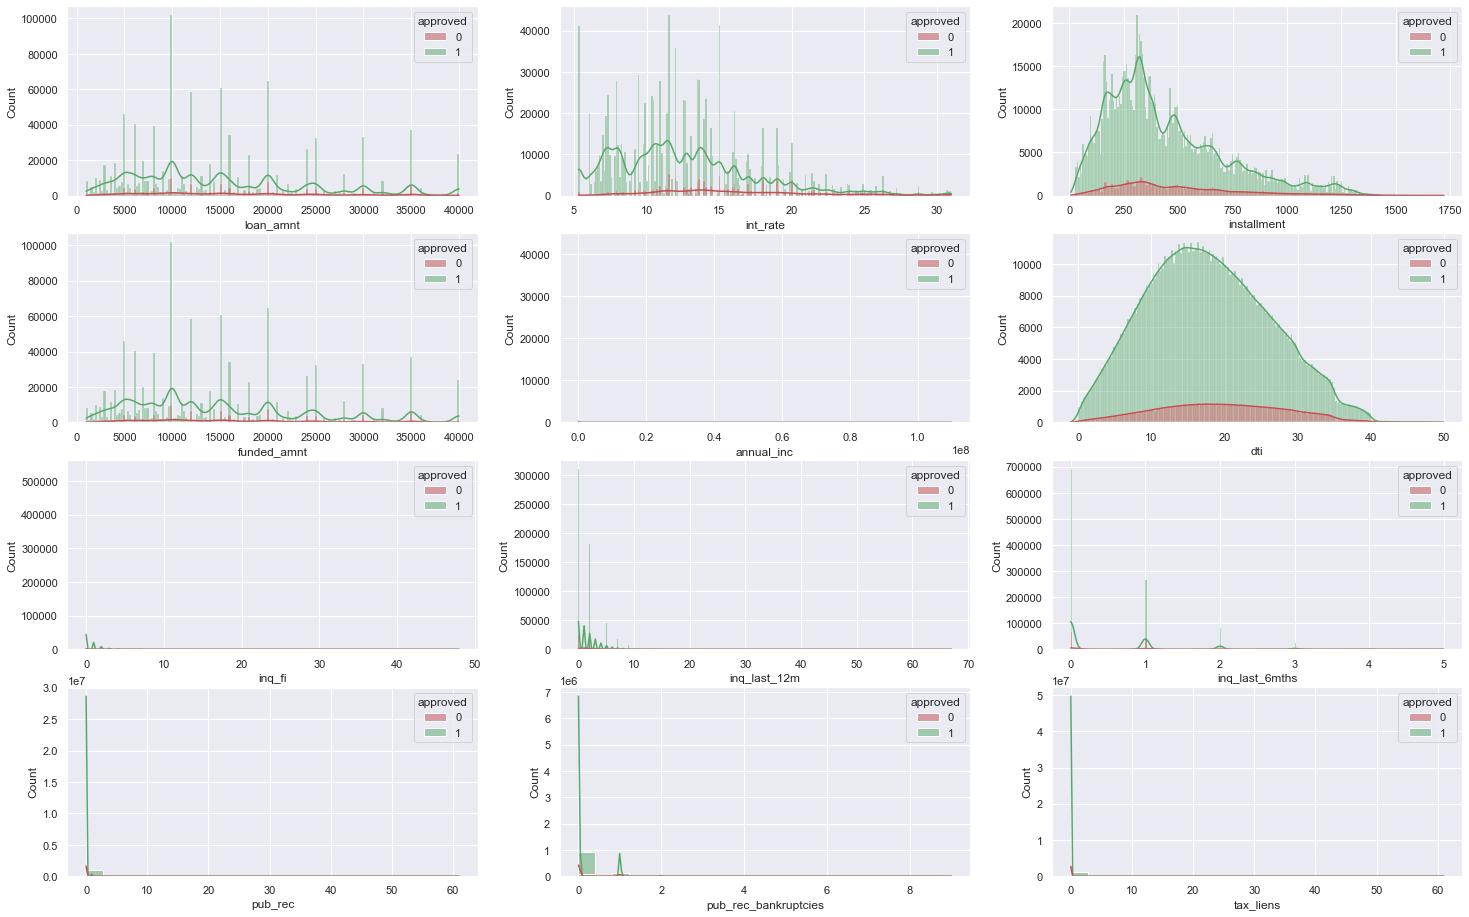

In [26]:
plot_compare_numerical_to_column(df)

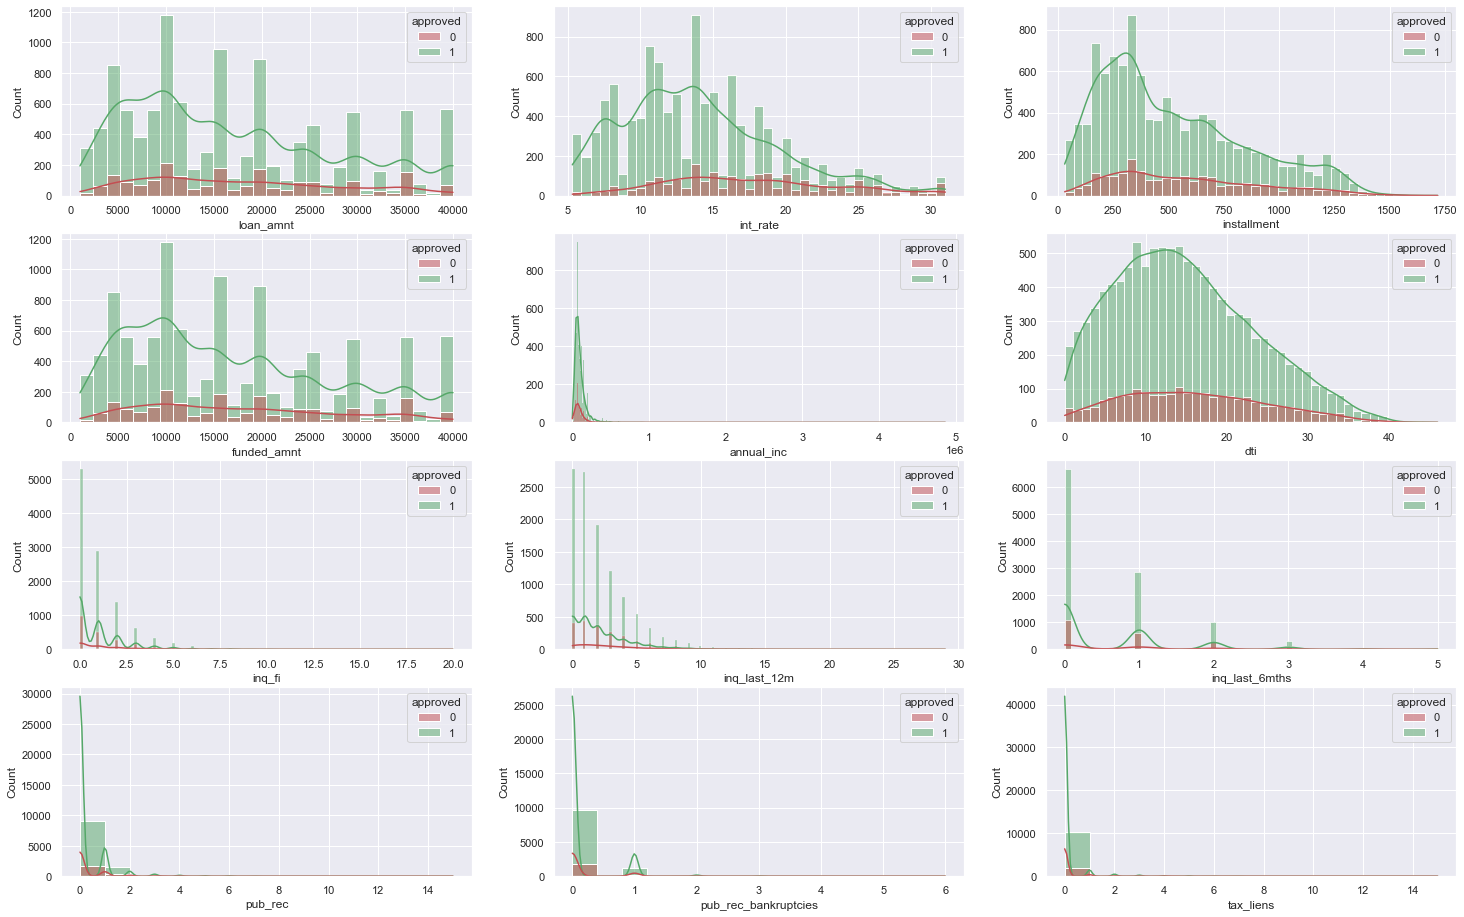

In [27]:
plot_compare_numerical_to_column(df[df['purpose'] == 'small_business'])

# Upsampling Data

1065631
121066


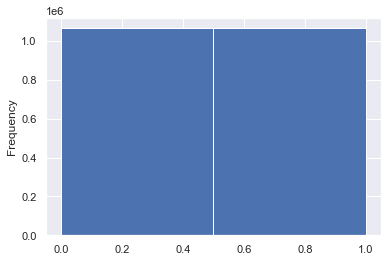

In [28]:
df.drop(columns=['approved'], inplace=True)
df_major = df[df['rejected']==0]
df_minor = df[df['rejected']==1]

print(len(df_major))
print(len(df_minor))

df_minor_upsampling = resample(df_minor, replace=True, n_samples=len(df) - len(df_minor), random_state=seed)
df_upsample = pd.concat([df_major, df_minor_upsampling])

df_upsample['rejected'].plot.hist(bins=2)
plt.show()

# Feature Engineering

In [29]:
Y = df['rejected'].copy()
X = df.drop(columns=['rejected']).copy()

Y_upsample = df_upsample['rejected'].copy()
X_upsample = df_upsample.drop(columns=['rejected']).copy()

In [30]:
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()

X[cat_columns] = X[cat_columns].apply(label_encoder.fit_transform)
X[cat_columns] = X[cat_columns].astype('object')
X_upsample[cat_columns] = X_upsample[cat_columns].apply(label_encoder.fit_transform)
X_upsample[cat_columns] = X_upsample[cat_columns].astype('object')

X_upsample.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,funded_amnt,inq_fi,inq_last_12m,inq_last_6mths,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,tax_liens,hardship_status,grade
0,2500,0,13.56,84.92,10,55000.0,0,18.24,2500,1.0,2.0,1.0,1.0,1.0,2,0,0.0,2,2
1,30000,1,18.94,777.23,10,90000.0,1,26.52,30000,2.0,2.0,0.0,1.0,1.0,2,0,0.0,2,3
2,5000,0,17.97,180.69,6,59280.0,1,10.51,5000,1.0,0.0,0.0,0.0,0.0,2,0,0.0,2,3
3,4000,0,18.94,146.51,10,92000.0,1,16.74,4000,2.0,3.0,0.0,0.0,0.0,2,0,0.0,2,3
4,30000,1,16.14,731.78,10,57250.0,0,26.35,30000,1.0,0.0,0.0,0.0,0.0,2,0,0.0,2,2


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186697 entries, 0 to 2260667
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1186697 non-null  int64  
 1   term                  1186697 non-null  object 
 2   int_rate              1186697 non-null  float64
 3   installment           1186697 non-null  float64
 4   emp_length            1186697 non-null  int64  
 5   annual_inc            1186697 non-null  float64
 6   verification_status   1186697 non-null  object 
 7   dti                   1186697 non-null  float64
 8   funded_amnt           1186697 non-null  int64  
 9   inq_fi                1186697 non-null  float64
 10  inq_last_12m          1186697 non-null  float64
 11  inq_last_6mths        1186697 non-null  float64
 12  pub_rec               1186697 non-null  float64
 13  pub_rec_bankruptcies  1186697 non-null  float64
 14  purpose               1186697 non-

In [32]:
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_columns)

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X_upsample[numerical_columns] = scaler.transform(X_upsample[numerical_columns])
X_upsample.head()

['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'funded_amnt', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'tax_liens']


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,funded_amnt,inq_fi,inq_last_12m,inq_last_6mths,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,tax_liens,hardship_status,grade
0,-1.324099,0,0.129799,-1.307152,1.089506,-0.202464,0,0.028034,-1.324097,-0.012043,-0.023438,0.602693,1.396376,2.379288,2,0,-0.125947,2,2
1,1.575351,1,1.194858,1.188287,1.089506,0.042762,1,1.006274,1.575353,0.658306,-0.023438,-0.636457,1.396376,2.379288,2,0,-0.125947,2,3
2,-1.060513,0,1.002831,-0.961948,0.015036,-0.172477,1,-0.885226,-1.060511,-0.012043,-0.861675,-0.636457,-0.346818,-0.355432,2,0,-0.125947,2,3
3,-1.165947,0,1.194858,-1.085150,1.089506,0.056775,1,-0.149183,-1.165945,0.658306,0.395680,-0.636457,-0.346818,-0.355432,2,0,-0.125947,2,3
4,1.575351,1,0.640552,1.024462,1.089506,-0.186700,0,0.986190,1.575353,-0.012043,-0.861675,-0.636457,-0.346818,-0.355432,2,0,-0.125947,2,2


# Model Training

In [33]:
def evaluate_function(model, X, Y):
    Y_pred = model.predict(X)
    print("=== Accuracy ===")
    acc = accuracy_score(Y, Y_pred)
    print(acc)

    print("=== Precision and Recall ===")
    precision = precision_score(Y, Y_pred)
    recall = recall_score(Y, Y_pred)
    
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    
    plot_confusion_matrix(model, X, Y)
    plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_upsample, Y_upsample, test_size=0.2, random_state=seed)

Intercept: [1.80597384]
Coef: [[-0.17582269  0.1569144  -0.50376164  0.41149277 -0.04104119 -0.22927258
   0.20868541  0.06697378 -0.17471785 -0.01143743  0.08137139  0.10457251
   0.1487767  -0.05059587  0.01197851  0.         -0.04903165 -1.82302437
   0.85458025]]
=== Training Set ===
=== Accuracy ===
0.6496147527667009
=== Precision and Recall ===
Precision: 0.6552627698172719
Recall: 0.6308960700493664


/Users/pumrapee/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


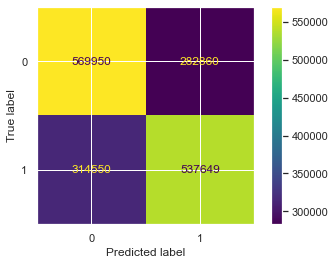

=== Test Set ===
=== Accuracy ===
0.6503602320687479
=== Precision and Recall ===
Precision: 0.6564530157480698
Recall: 0.6329884928220698


/Users/pumrapee/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


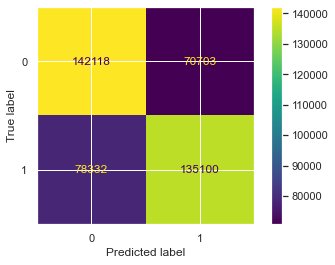

=== All Data Set ===
=== Accuracy ===
0.6644467795907464
=== Precision and Recall ===
Precision: 0.17774516735195073
Recall: 0.6313002824905424


/Users/pumrapee/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


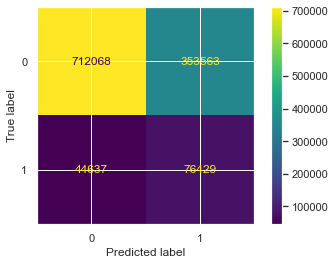

In [39]:
# logit_model = LogisticRegression(random_state=seed).fit(X_train, y_train)
print("Intercept: " + str(logit_model.intercept_))
print("Coef: " + str(logit_model.coef_))

print("=== Training Set ===")
evaluate_function(logit_model, X_train, y_train)
print("=== Test Set ===")
evaluate_function(logit_model, X_test, y_test)
print("=== All Data Set ===")
evaluate_function(logit_model, X, Y)

=== Training Set ===
=== Accuracy ===
0.9999829912921281
=== Precision and Recall ===
Precision: 0.9999953061449603
Recall: 0.9999706641289182


/Users/pumrapee/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


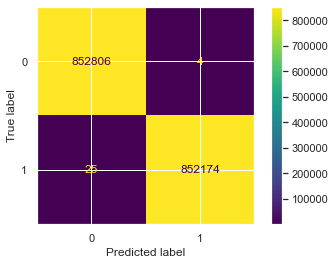

=== Test Set ===
=== Accuracy ===
0.9905455210872416
=== Precision and Recall ===
Precision: 0.9823908295937267
Recall: 0.9990254507290378


/Users/pumrapee/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


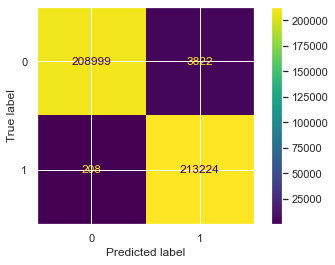

=== All Data Set ===
=== Accuracy ===
0.9966840735250868
=== Precision and Recall ===
Precision: 0.9693387721083802
Recall: 0.9990996646457304


/Users/pumrapee/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


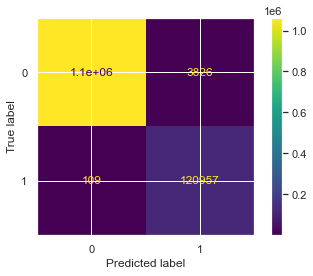

In [40]:
# tree = RandomForestClassifier(random_state=seed)
# tree.fit(X_train, y_train)

print("=== Training Set ===")
evaluate_function(tree, X_train, y_train)
print("=== Test Set ===")
evaluate_function(tree, X_test, y_test)
print("=== All Data Set ===")
evaluate_function(tree, X, Y)